In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np

In [3]:
from ForwardModeling.ForwardProcessing1D import forward_with_trace_calcing
from Inversion.Strategies.SeismDiffInversion1D import inverse
from Inversion.Optimizators.Optimizations import LBFGSBOptimization, DifferentialEvolution
from Tests.test_ForwardProcessing1D import get_model_2layered, get_model_3layered
from Objects.Data.WavePlaceholder import OWT, WaveDataPlaceholder
from Objects.Models.Models import SeismicModel1D
from Objects.Attributes.RockPhysics.RockPhysicsAttribute import RockPhysicsAttribute
from Objects.Models.Layer1D import Layer1D, LayerOPT

In [4]:
from matplotlib import pyplot as plt

In [5]:
layer_1_dict, layer_2_dict, layer_3_dict = get_model_3layered()
h = 500

In [6]:
from Inversion.Strategies.SeismDiffInversion1D import func_to_optimize

In [71]:
def plot_1D_err(forward_params, nvals, min_max=None):
    
    if min_max is None:
        min_val = forward_params['model'].get_optimization_option("min", vectorize=True)
        max_val = forward_params['model'].get_optimization_option("max", vectorize=True)
        
    else:
        min_val = np.array([min_max[0]])
        max_val = np.array([min_max[1]])
    
    dval = (max_val - min_val) / nvals

    val_x = [min_val + dval*i for i in range(nvals+1)]
    errs = []
    for val in val_x:
        errs.append(func_to_optimize(val, placeholders, forward_params, helper=None, show_tol=False))
        
    plt.plot(val_x, errs)
    plt.plot(val_x, errs, 'o')
        
    plt.show()

In [ ]:
def get_param_int_values()

In [8]:
def optimization_func_2D(forward_params, x, y):
    indexes_1 = np.arange(x.shape[0])
    indexes_2 = np.arange(x.shape[1])
    
    Z = np.zeros((x.shape[0], x.shape[1]))
    
    for ind1 in indexes_1:
        for ind2 in indexes_2:
            Z[ind1, ind2] = func_to_optimize([x[ind1, ind2], y[ind1, ind2]], placeholders, forward_params, helper=None, show_tol=False)
        
    return Z

In [9]:
def plot_2D_err(forward_params, nvals, ncontous=10):
    min_val = forward_params['model'].get_optimization_option("min", vectorize=True)
    max_val = forward_params['model'].get_optimization_option("max", vectorize=True)
    
    dval = (max_val - min_val) / nvals

    val_1_x = [min_val[0] + dval[0]*i for i in range(nvals[0]+1)]
    val_2_x = [min_val[1] + dval[1]*i for i in range(nvals[1]+1)]

    X, Y = np.meshgrid(val_1_x, val_2_x)

    Z = optimization_func_2D(forward_params, X, Y)
    
    plt.contourf(X, Y, Z, ncontous, cmap='cool')
    plt.colorbar()

# 2-layered model

In [10]:
layer_1 = Layer1D(h,
                  rp_attribute=RockPhysicsAttribute(layer_1_dict["components"], layer_1_dict["name"]),
                  seism_attribute=None,
                  opt=LayerOPT.RP)

layer_2 = Layer1D(-1,
                  rp_attribute=RockPhysicsAttribute(layer_2_dict["components"], layer_2_dict["name"]),
                  seism_attribute=None,
                  opt=LayerOPT.RP)

In [11]:
dx = 100
nx = 20
x_rec = [i * dx for i in range(1, nx)]
wave_types = [OWT.PdPu]

In [12]:
model = SeismicModel1D([layer_1, layer_2])
model_true = SeismicModel1D([layer_1, layer_2])
model_opt = SeismicModel1D([layer_1, layer_2])

In [13]:
observe, test_seismic = \
    forward_with_trace_calcing(model, x_rec,
                               dt=3e-03, trace_len=1500, wavetypes=wave_types, display_stat=True,
        visualize_res=False)

Calculating rockphysics model...
Rockphysics model calculated!
Calculating PdPu-rays...
Calculating PdPu-reflections...
Calculating p-refractions...


In [14]:
forward_params = {
    "model": model,
    "x_rec": x_rec,
    "dt": 3e-03,
    "trace_len": 1500,
    "wavetypes": wave_types,
    "display_stat": False,
    "visualize_res": False
}

In [10]:
placeholders = {}
for wt in wave_types:
    placeholders[wt] = WaveDataPlaceholder(
        wt,
        test_seismic[wt]["rays"],
        test_seismic[wt]["seismogram"]
    )

In [21]:
optimizers = [
    LBFGSBOptimization(
        maxiter=15000,
        maxfun=15000,
        factr=10000,
        maxls=50,
        epsilon=0.000001
    )
]

In [132]:
optimizers = [
    DifferentialEvolution()
]

In [133]:
forward_params['model'].layers[0]['Km'] = 10

In [134]:
forward_params['model'].layers[1]['Km'] = 25

In [135]:
forward_params['model'].layers[0].rp_attribute.vals_dict['Km']["optimize"] = True

In [136]:
forward_params['model'].layers[1].rp_attribute.vals_dict['Km']["optimize"] = True

In [139]:
inversed_model = inverse(optimizers, error=0.01, placeholders=placeholders, forward_params=forward_params)

0.28963981555513735
0.24318202245426948
0.3036591384718607
0.2681994770851526
0.3158887885125874
0.11733143944421526
0.23793330149363667
0.1928839756728753
0.3190887519398826
0.22500372786123748
0.24119477271271672
0.23933181656513197
0.20139060678181012
0.2170747273431636
0.05231358982842281
0.2039342095252275
0.06495235257187576
0.28911024162799975
0.14736149433550547
0.04847486972811233
0.32747266041135775
0.22567450699539163
0.1897540988256148
0.29991395966586487
0.16389648856082809
0.2046265374964593
0.3453497955095944
0.34798394179843034
0.30995865653319915
0.23070859734782234
0.3554557834285149
0.09506400783975795
0.19379078437235014
0.2692708845884677
0.3373489632757625
0.2479217271179494
0.2365875651460144
0.28514604481474237
0.23422753430183002
0.35055564728627425
0.21292978534022688
0.11371672695670602
0.04699641873161136
0.2235219582602103
0.23899108129730584
0.15485987233380266
0.18928561374821
0.369617913270291
0.2273681507180174
0.21342626667854356
0.30853361416511155
0.

In [140]:
inversed_model

array([ 7.31822513, 21.18522283])

## Single variable opt

In [111]:
from Inversion.Strategies.SeismDiffInversion1D import func_to_optimize

In [112]:
forward_params['model'].layers[0].rp_attribute.vals_dict['Km']["optimize"] = False

In [113]:
forward_params['model'].layers[1].rp_attribute.vals_dict['Km']["optimize"] = True

In [114]:
forward_params['model'].layers[0]['Km'] = 7.3

In [104]:
forward_params['model'].layers[1]['Km'] = 21.5

In [105]:
forward_params['model'].get_optimization_option("val", vectorize=True)

array([21.5])

In [106]:
min_val = forward_params['model'].get_optimization_option("min", vectorize=True)
max_val = forward_params['model'].get_optimization_option("max", vectorize=True)

In [107]:
nvals = 30

In [109]:
dval = (max_val - min_val) / nvals

val_x = [min_val + dval*i for i in range(nvals+1)]
errs = []
for val in val_x:
    errs.append(func_to_optimize(val, placeholders, forward_params, helper=None, show_tol=False))

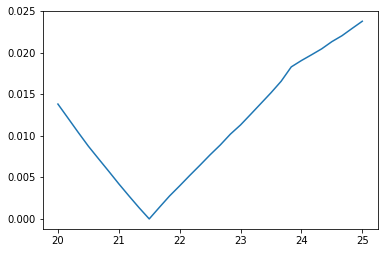

In [110]:
plt.plot(val_x, errs)

## Duo variable opt

In [7]:
forward_params['model'].layers[1].rp_attribute.vals_dict['Km']["optimize"] = True

NameError: name 'forward_params' is not defined

In [8]:
forward_params['model'].get_optimization_option("val", vectorize=True)

NameError: name 'forward_params' is not defined

In [37]:
min_val = forward_params['model'].get_optimization_option("min", vectorize=True)
max_val = forward_params['model'].get_optimization_option("max", vectorize=True)

In [52]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


In [ ]:
dval = (max_val - min_val) / nvals

val_1_x = [min_val[0] + dval[0]*i for i in range(nvals[0]+1)]
val_2_x = [min_val[1] + dval[1]*i for i in range(nvals[1]+1)]

X, Y = np.meshgrid(val_1_x, val_2_x)

Z = optimization_func_2D(X, Y)

In [93]:
Z.shape

(8, 11)

In [94]:
X.shape

(8, 11)

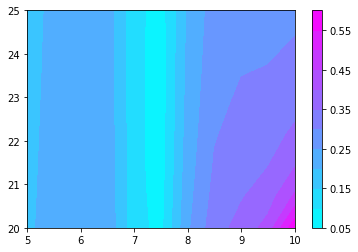

In [98]:
plt.contourf(X, Y, Z, 10, cmap='cool')
plt.colorbar()

# 3-layered model

In [117]:
layer_1_dict, layer_2_dict, layer_3_dict = get_model_3layered()

In [118]:
layer_3_1 = Layer1D(h,
                  rp_attribute=RockPhysicsAttribute(layer_1_dict["components"], layer_1_dict["name"]),
                  seism_attribute=None,
                  opt=LayerOPT.RP)

layer_3_2 = Layer1D(h,
                  rp_attribute=RockPhysicsAttribute(layer_2_dict["components"], layer_2_dict["name"]),
                  seism_attribute=None,
                  opt=LayerOPT.RP)

layer_3_3= Layer1D(-1,
                  rp_attribute=RockPhysicsAttribute(layer_3_dict["components"], layer_2_dict["name"]),
                  seism_attribute=None,
                  opt=LayerOPT.RP)

In [119]:
dx = 300
nx = 5
x_rec = [i * dx for i in range(1, nx+1)]
wave_types = [OWT.PdPu]

In [120]:
model_3l = SeismicModel1D([layer_3_1, layer_3_2, layer_3_3])

In [121]:
observe, test_seismic = \
    forward_with_trace_calcing(model_3l, x_rec,
                               dt=3e-03, trace_len=1500, wavetypes=wave_types, display_stat=True,
        visualize_res=False)

Calculating rockphysics model...
Rockphysics model calculated!
Calculating PdPu-rays...
Calculating PdPu-reflections...
Calculating p-refractions...


In [122]:
forward_params = {
    "model": model_3l,
    "x_rec": x_rec,
    "dt": 3e-03,
    "trace_len": 1500,
    "wavetypes": wave_types,
    "display_stat": False,
    "visualize_res": False
}

In [123]:
placeholders = {}
for wt in wave_types:
    placeholders[wt] = WaveDataPlaceholder(
        wt,
        test_seismic[wt]["rays"],
        test_seismic[wt]["seismogram"]
    )

In [134]:
optimizers = [
    LBFGSBOptimization(
        maxiter=15000,
        maxfun=15000,
        factr=10000,
        maxls=50,
        epsilon=0.000001
    )
]

In [124]:
optimizers = [
    DifferentialEvolution(
    )
]

### Km optimization

In [135]:
opt_flag = True
# opt_flag = False
if opt_flag:
    forward_params['model'].layers[0]["Km"] = 7.8
    forward_params['model'].layers[0].opt = LayerOPT.RP
    forward_params['model'].layers[0].rp_attribute.vals_dict['Km']['optimize'] = True
    
else:
    forward_params['model'].layers[0]["Km"] = 7.3
    forward_params['model'].layers[0].opt = LayerOPT.NO
    forward_params['model'].layers[0].rp_attribute.vals_dict['Km']['optimize'] = False

In [136]:
# opt_flag = True
opt_flag = False

if opt_flag:
    forward_params['model'].layers[1]["Km"] = 24
    forward_params['model'].layers[1].opt = LayerOPT.RP
    forward_params['model'].layers[1].rp_attribute.vals_dict['Km']['optimize'] = True

else:
    # TRUE VALUE
    forward_params['model'].layers[1]["Km"] = 21.5
    forward_params['model'].layers[1].opt = LayerOPT.NO
    forward_params['model'].layers[1].rp_attribute.vals_dict['Km']['optimize'] = False



In [137]:
# opt_flag = True
opt_flag = False

if opt_flag:
    forward_params['model'].layers[2]["Km"] = 20
    forward_params['model'].layers[2].opt = LayerOPT.RP
    forward_params['model'].layers[2].rp_attribute.vals_dict['Km']['optimize'] = True

else:
    # TRUE VALUE
    forward_params['model'].layers[2]["Km"] = 22
    forward_params['model'].layers[2].opt = LayerOPT.NO
    forward_params['model'].layers[2].rp_attribute.vals_dict['Km']['optimize'] = False



### Gm optimization

In [51]:
# opt_flag = True
opt_flag = False
if opt_flag:
    forward_params['model'].layers[0]["Gm"] = 5
    forward_params['model'].layers[0].opt = LayerOPT.RP
    forward_params['model'].layers[0].rp_attribute.vals_dict['Gm']['optimize'] = True
    
else:
    forward_params['model'].layers[0]["Gm"] = 2.71
    forward_params['model'].layers[0].opt = LayerOPT.NO
    forward_params['model'].layers[0].rp_attribute.vals_dict['Gm']['optimize'] = False

In [52]:
# opt_flag = True
opt_flag = False

if opt_flag:
    forward_params['model'].layers[1]["Gm"] = 15
    forward_params['model'].layers[1].opt = LayerOPT.RP
    forward_params['model'].layers[1].rp_attribute.vals_dict['Gm']['optimize'] = True

else:
    # TRUE VALUE
    forward_params['model'].layers[1]["Gm"] = 17.5
    forward_params['model'].layers[1].opt = LayerOPT.NO
    forward_params['model'].layers[1].rp_attribute.vals_dict['Gm']['optimize'] = False



In [54]:
# opt_flag = True
opt_flag = False

if opt_flag:
    forward_params['model'].layers[2]["Gm"] = 15
    forward_params['model'].layers[2].opt = LayerOPT.RP
    forward_params['model'].layers[2].rp_attribute.vals_dict['Gm']['optimize'] = True

else:
    # TRUE VALUE
    forward_params['model'].layers[2]["Gm"] = 10.7
    forward_params['model'].layers[2].opt = LayerOPT.NO
    forward_params['model'].layers[2].rp_attribute.vals_dict['Gm']['optimize'] = False



## Model calcing

In [138]:
inversed_model = inverse(optimizers, error=0.01, placeholders=placeholders, forward_params=forward_params)

1.312018687808697
1.3120271654205542
3.280484543094032
3.280484474706101
0.44711150085055734
0.44711142962303957
0.44661956452305185
0.44661948876840873
0.39559585055659585
0.3955957502860886
0.2890443240869008
0.2890439906972439
0.926348791333576
0.9263461464536831
0.2814158570747419
0.28141549222164675
0.27463593415107856
0.27463554243161703
0.3128841913709639
0.31289001726094046
0.17856219760621836
0.17856102681077868
0.06381611777746105
0.06381403152015458
0.06127049223557853
0.06127278317852551
0.06127049223557853
0.06127278317852551
0.44642414867276764
0.44642407116128774
0.17789117266417623
0.1778899945895876
0.05963765230437488
0.05963551145434245
0.054884033893593046
0.05488623814619679
0.05681201636728847
0.056809838218589974
0.05442939746506695
0.0544271876260919
0.05442939746506695
0.0544271876260919
0.05769049514350417
0.05769273729640502
0.054791239410679676
0.05479344241531442
0.05439360471372023
0.054395802374505885
0.054386799827645244
0.05438458942013944
0.05437260496

In [139]:
inversed_model

array([7.29999987])

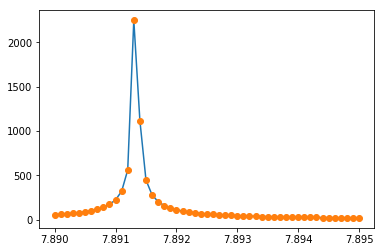

In [152]:
plot_1D_err(forward_params, 50, [7.89, 7.895])

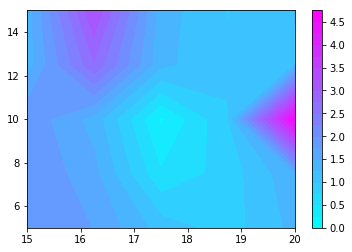

In [82]:
plot_2D_err(forward_params, [4, 4], 20)

Calculating rockphysics model...
Rockphysics model calculated!
Calculating PdPu-rays...
Calculating PdPu-reflections...
Calculating p-refractions...


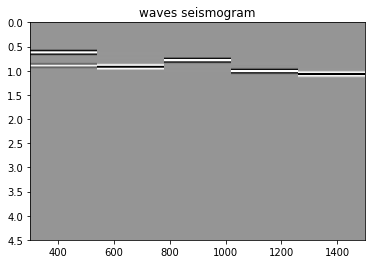

In [143]:
res = forward_with_trace_calcing(forward_params['model'], forward_params['x_rec'], 
                           dt=forward_params['dt'], 
                           trace_len=forward_params['trace_len'], 
                           wavetypes=forward_params['wavetypes'],
            display_stat=True, visualize_res=False,
                               visualize_seismograms=True
            )